In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
img_path = r'/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train/a8b3ad1dde.jpg'

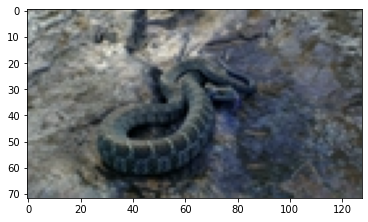

In [3]:
img_arr = cv2.imread(img_path)
plt.imshow(img_arr)

In [4]:
df = pd.read_csv('/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train.csv')

In [5]:
display(df)

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix
...,...,...
5503,5f0c970adf,lampropeltis-triangulum
5504,f6a4287fac,pantherophis-alleghaniensis
5505,d3c10e63e1,thamnophis-sirtalis
5506,61ef50879c,pituophis-catenifer


In [ ]:
df.isnull().values.any()

In [157]:
ip = r'/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train'
ip = os.path.join(ip,df['image_id'].values[0])
ip += '.jpg'
print(ip)

/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train/a8b3ad1dde.jpg


In [ ]:
ia = cv2.imread(ip)
print(ia)

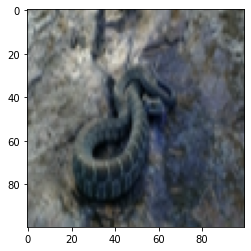

In [158]:
ia = cv2.resize(ia,(100,100))
plt.imshow(ia)

In [7]:
len(df)

5508

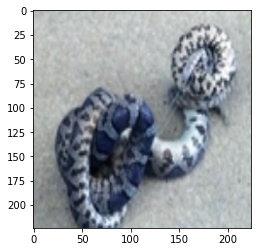

In [6]:
data = []
img_size = 224
dir = r'/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train'

for i in range(len(df)):
    label = df['breed'].values[i]
    id = df['image_id'].values[i]
    img_path = os.path.join(dir,id)
    img_path += '.jpg'
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(img_size,img_size))
    plt.imshow(img_arr)
    data.append([img_arr, label])
    
    




In [7]:
len(data)

5508

In [8]:
random.shuffle(data)

In [9]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [10]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(5508, 224, 224, 3)
(5508,)


In [11]:
X = X / 255.0

In [12]:
d={}
count=0
for i in y:
    if i not in d.keys():
        d[i]=count
        count+=1
y_final=[]
for i in y:
    y_final.append(d[i])
y_final=np.array(y_final)
y=y_final
print(y)
print(count)

[ 0  1  2 ... 12 13  5]
35


In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Sequential
from keras.models import Model
from keras import backend as K


In [168]:
model = Sequential()

model.add(Conv2D(64, (2,2), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (2,2), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (2,2), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (2,2), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512, (2,2), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(35, activation = 'softmax'))

In [169]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [171]:
model.fit(xTrain,yTrain,epochs = 50, validation_split = 0.4)

Epoch 1/50
83/83 [==============================] - 1s 13ms/step - loss: 3.4181 - accuracy: 0.0685 - val_loss: 3.3822 - val_accuracy: 0.0754
Epoch 2/50
83/83 [==============================] - 1s 10ms/step - loss: 3.3799 - accuracy: 0.0866 - val_loss: 3.3744 - val_accuracy: 0.1038
Epoch 3/50
83/83 [==============================] - 1s 10ms/step - loss: 3.3827 - accuracy: 0.0757 - val_loss: 3.3706 - val_accuracy: 0.1038
Epoch 4/50
83/83 [==============================] - 1s 12ms/step - loss: 3.3778 - accuracy: 0.0776 - val_loss: 3.3706 - val_accuracy: 0.1038
Epoch 5/50
83/83 [==============================] - 1s 10ms/step - loss: 3.3749 - accuracy: 0.0673 - val_loss: 3.3696 - val_accuracy: 0.1038
Epoch 6/50
83/83 [==============================] - 1s 10ms/step - loss: 3.3702 - accuracy: 0.0863 - val_loss: 3.4164 - val_accuracy: 0.0754
Epoch 7/50
83/83 [==============================] - 1s 10ms/step - loss: 3.3775 - accuracy: 0.0795 - val_loss: 3.3710 - val_accuracy: 0.0754
Epoch 8/50
83

In [172]:
model.evaluate(x=xTest, y=yTest)

35/35 [==============================] - 0s 5ms/step - loss: 11.5919 - accuracy: 0.0862


[11.591876029968262, 0.08620689809322357]

In [15]:
	
from keras.applications.resnet50 import ResNet50 


In [17]:
resnet = ResNet50(weights = 'imagenet', include_top = False, input_shape = (img_size,img_size,3))

94773248/94765736 [==============================] - 1s 0us/step


In [19]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [20]:
output = resnet.layers[-1].output
output = Dense(35, activation='relu')(output)


In [22]:
resnet = Model(inputs = resnet.input, outputs = output)

In [23]:
resnet.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [25]:
yTrain

(5508,)

In [186]:
predictions = Dense(35, activation='relu')(xTrain)


In [187]:
newModel = Model(inputs = model.input, outputs = predictions)

AttributeError: Tensor.op is meaningless when eager execution is enabled.